# Analysis of COVID-19 Impact on ABC Company's Parcel Business

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load and Explore the Dataset

In [2]:
parcel_data = pd.read_csv('COVID_Parcel_Business.csv')

In [3]:
print("Dataset Overview:")
parcel_data

Dataset Overview:


,FakeCustomerID,THE_YEAR,THE_WEEK,VOLUME
0,718117,2021,1,8
1,718117,2020,7,257
2,718117,2019,39,141
3,718117,2018,1,14
4,718117,2021,2,192
...,...,...,...,...
190714,228893,2019,13,30
190715,228893,2019,38,122
190716,228893,2019,48,99
190717,228893,2019,20,61


## Descriptive Statistics

In this step, we perform basic descriptive analysis of the dataset:
1. **Total Records:** Calculate the total number of rows in the dataset.
2. **Column-wise Summary:** Generate statistical summaries (e.g., mean, median, standard deviation) for numerical columns and high-level metadata for non-numerical columns.
3. **Missing Values:** Identify missing values to understand data quality issues.

This analysis provides an overview of the dataset and highlights any anomalies or missing information that need to be addressed before further analysis.


In [4]:
total_records = parcel_data.shape[0]
column_summary = parcel_data.describe(include='all')
missing_values = parcel_data.isnull().sum()

print(f"Total Records: {total_records}")
print("\nColumn-wise Summary:")
print(column_summary)
print("\nMissing Values:")
print(missing_values)

Total Records: 190719

Column-wise Summary:
       FakeCustomerID       THE_YEAR       THE_WEEK         VOLUME
count   190719.000000  190719.000000  190719.000000  190719.000000
mean    541440.234963    2019.395220      25.676377    1174.911519
std     264861.365663       1.068845      14.722539   11586.730666
min     100771.000000    2018.000000       1.000000       1.000000
25%     308930.000000    2018.000000      13.000000      25.000000
50%     529707.000000    2019.000000      25.000000      58.000000
75%     778800.000000    2020.000000      38.000000     162.000000
max     999362.000000    2021.000000      53.000000  640590.000000

Missing Values:
FakeCustomerID    0
THE_YEAR          0
THE_WEEK          0
VOLUME            0
dtype: int64


In [5]:
colors = ['#000b5d', '#0063a1', '#3e95be']

In [6]:
yearly_pivot = parcel_data.pivot_table(values='VOLUME', index='THE_YEAR', aggfunc='sum')

In [7]:
yearly_pivot

,VOLUME
THE_YEAR,
2018,49099478
2019,52823114
2020,73475690
2021,48679668


## Yearly and Weekly Impact Analysis on Parcel Volumes

To analyze the impact of COVID-19 on ABC Company's parcel business in terms of volume, we performed the following:

1. **Year-to-Year Analysis (Bar Graph)**:
   - We visualized the total parcel volume for each year.
   - This bar graph highlights trends in parcel shipments across years, helping us identify significant changes in volume during the pandemic.

2. **Week-to-Week Analysis by Year (Line Graph)**:
   - A line graph was used to compare weekly parcel volumes across different years.
   - This visualization allows us to observe patterns and anomalies in weekly trends, such as seasonal peaks or dips caused by COVID-19 events.

These analyses provide a clear understanding of how parcel volumes were impacted year-over-year and week-to-week during the observation period.


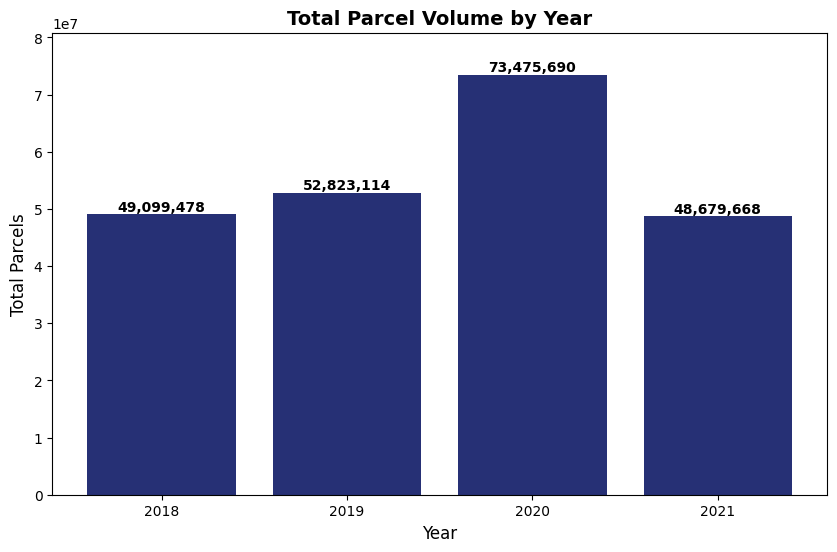

In [8]:
plt.figure(figsize=(10, 6))
bars = plt.bar(yearly_pivot.index, yearly_pivot['VOLUME'], color='#000b5d', alpha=0.85)


plt.title('Total Parcel Volume by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Total Parcels', fontsize=12)


y_max = yearly_pivot['VOLUME'].max() * 1.1
plt.ylim(0, y_max)

plt.xticks(ticks=yearly_pivot.index, labels=yearly_pivot.index, fontsize=10)


for bar in bars:
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        f"{bar.get_height():,.0f}",
        ha='center',
        va='bottom',
        fontsize=10,
        fontweight='bold',
        color='black'
    )

plt.show()

In [9]:
weekly_pivot = parcel_data.pivot_table(values='VOLUME', index='THE_WEEK', columns='THE_YEAR', aggfunc='sum')

In [10]:
weekly_pivot

THE_YEAR,2018,2019,2020,2021
THE_WEEK,,,,
1,817751.0,814361.0,554951.0,134137.0
2,925839.0,1048800.0,1078417.0,1583754.0
3,854760.0,1073634.0,1008084.0,1322546.0
4,800040.0,937502.0,934713.0,1310292.0
5,812249.0,870849.0,938521.0,1270718.0
6,816852.0,788670.0,873763.0,1207747.0
7,745839.0,938386.0,786626.0,1045947.0
8,662325.0,764078.0,882633.0,1042340.0
9,841255.0,803745.0,903362.0,1153193.0


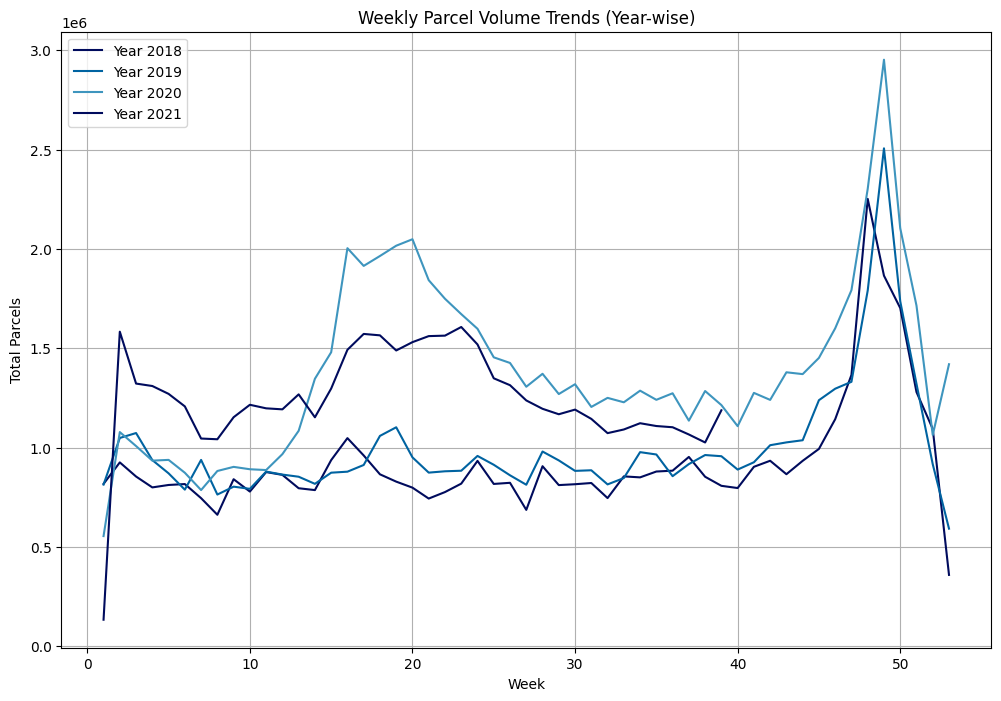

In [11]:
plt.figure(figsize=(12, 8))
for idx, year in enumerate(weekly_pivot.columns):
    plt.plot(weekly_pivot.index, weekly_pivot[year], label=f'Year {year}', color=colors[idx % len(colors)])
plt.title('Weekly Parcel Volume Trends (Year-wise)')
plt.xlabel('Week')
plt.ylabel('Total Parcels')
plt.grid(True)
plt.legend()
plt.show()

### Weekly Parcel Volume Analysis with Key COVID-19 Events

In this analysis, we examined the weekly parcel volume trends and overlaid significant COVID-19 events to identify which events triggered changes in parcel volume. The following key events were included:

1. **January 27, 2020**: The first confirmed COVID-19 case in Canada.  
   - Minimal impact expected as public awareness was still low.

2. **March 11, 2020**: The World Health Organization (WHO) declared COVID-19 a pandemic.  
   - Likely triggered a surge in parcel volumes as panic buying and increased e-commerce activities began.

3. **March 16, 2020**: Federal public servants were urged to work from home.  
   - Increased demand for home deliveries of work-related items and personal supplies.

4. **March 18, 2020**: Canada-U.S. border restrictions were imposed.  
   - Shift in demand towards domestic parcel deliveries.

5. **March 23, 2020**: Canada Post implemented COVID-19 delivery standards.  
   - Initial slowdown due to safety measures but later stabilized as businesses adapted.

6. **April 6, 2020**: The Canada Emergency Response Benefit (C.E.R.B.) was launched.  
   - Stabilized consumer spending, likely sustaining the rise in parcel volumes.

By overlaying these events on the weekly trends, we can observe how each milestone affected parcel volumes. For example:
- **Sharp rises** in volume may align with the pandemic declaration and lockdowns.
- **Stabilization** in trends could coincide with measures like C.E.R.B.

This analysis helps pinpoint the key drivers of changes in parcel volume during the COVID-19 timeline.


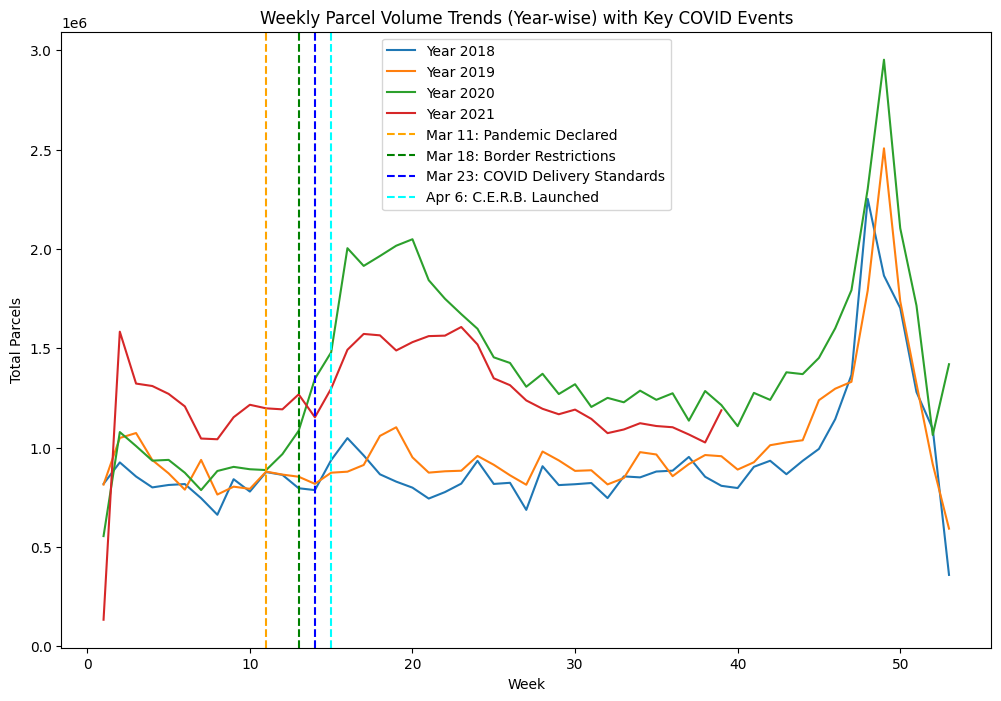

In [12]:
plt.figure(figsize=(12, 8))


for year in weekly_pivot.columns:
    plt.plot(weekly_pivot.index, weekly_pivot[year], label=f'Year {year}')


# plt.axvline(x=5, color='red', linestyle='--', label='Jan 27: 1st Case in Canada')
plt.axvline(x=11, color='orange', linestyle='--', label='Mar 11: Pandemic Declared')
# plt.axvline(x=12, color='purple', linestyle='--', label='Mar 16: Work From Home')
plt.axvline(x=13, color='green', linestyle='--', label='Mar 18: Border Restrictions')
plt.axvline(x=14, color='blue', linestyle='--', label='Mar 23: COVID Delivery Standards')
plt.axvline(x=15, color='cyan', linestyle='--', label='Apr 6: C.E.R.B. Launched')

# Chart Details
plt.title('Weekly Parcel Volume Trends (Year-wise) with Key COVID Events')
plt.xlabel('Week')
plt.ylabel('Total Parcels')
plt.legend()
plt.show()

### Peak Season Analysis: Impact of COVID-19 on Parcel Volumes

In this analysis, we compared the parcel volumes during the **peak seasons** in 2019 (pre-COVID) and 2020 (during COVID). The goal is to understand how the pandemic influenced business during the most critical period of the year for parcel deliveries.

#### Peak Season Definitions:
- **Pre-COVID Peak Season (2019)**: November 4, 2019 – January 20, 2020 (Weeks 45–4).
- **COVID Peak Season (2020)**: November 2, 2020 – January 17, 2021 (Weeks 45–4).

#### Metrics and Visualizations:
1. **Total Parcel Volume Comparison (Bar Chart)**:
   - A bar chart was used to compare the total parcel volumes for the peak seasons in 2019 and 2020.


2. **Weekly Parcel Volume Trends (Line Graph)**:
   - A weekly trend line graph highlights how parcel volumes fluctuated within the peak seasons of both years.

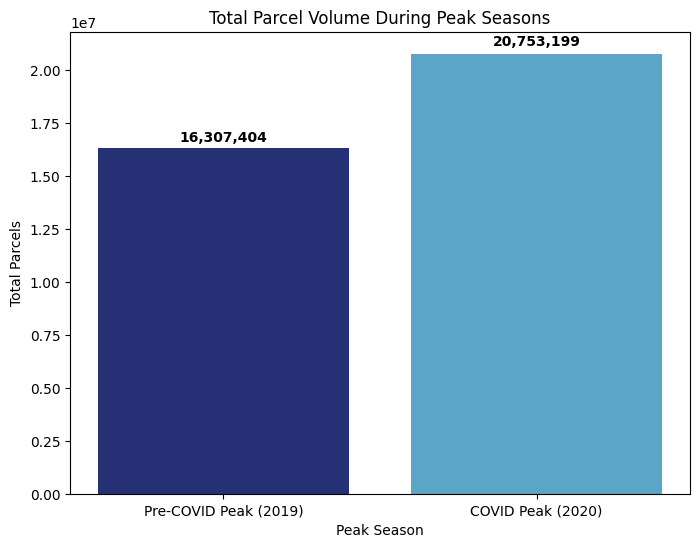

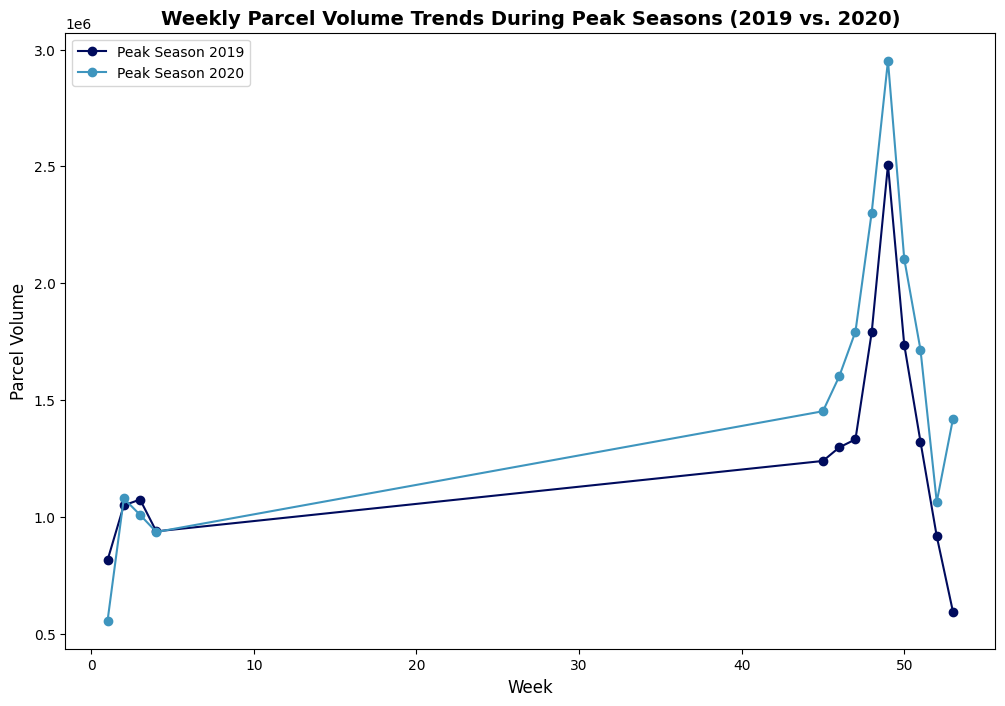

In [13]:
# Filter data for peak seasons
pre_covid_peak = parcel_data[(parcel_data['THE_YEAR'] == 2019) & (parcel_data['THE_WEEK'].between(45, 53)) |
                             (parcel_data['THE_YEAR'] == 2020) & (parcel_data['THE_WEEK'].between(1, 4))]
covid_peak = parcel_data[(parcel_data['THE_YEAR'] == 2020) & (parcel_data['THE_WEEK'].between(45, 53)) |
                         (parcel_data['THE_YEAR'] == 2021) & (parcel_data['THE_WEEK'].between(1, 4))]

# Aggregate total volume by peak season
peak_comparison = pd.DataFrame({
    'Season': ['Pre-COVID Peak (2019)', 'COVID Peak (2020)'],
    'Total Parcels': [
        pre_covid_peak['VOLUME'].sum(),
        covid_peak['VOLUME'].sum()
    ]
})

# Bar Chart for Total Volumes
plt.figure(figsize=(8, 6))
plt.bar(peak_comparison['Season'], peak_comparison['Total Parcels'], color=['#000b5d', '#3e95be'], alpha=0.85)
plt.title('Total Parcel Volume During Peak Seasons')
plt.ylabel('Total Parcels')
plt.xlabel('Peak Season')
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Add data labels
for index, value in enumerate(peak_comparison['Total Parcels']):
    plt.text(index, value + (value * 0.02), f"{value:,.0f}", ha='center', fontsize=10, fontweight='bold')

plt.show()

# Weekly Trends for Peak Seasons
plt.figure(figsize=(12, 8))
for year, color in zip([2019, 2020], ['#000b5d', '#3e95be']):
    data = parcel_data[(parcel_data['THE_YEAR'] == year) &
                       (parcel_data['THE_WEEK'].between(45, 53) | parcel_data['THE_WEEK'].between(1, 4))]
    weekly_trend = data.groupby('THE_WEEK')['VOLUME'].sum()
    plt.plot(weekly_trend.index, weekly_trend.values, marker='o', label=f'Peak Season {year}', color=color)

# Chart Details
plt.title('Weekly Parcel Volume Trends During Peak Seasons (2019 vs. 2020)', fontsize=14, fontweight='bold')
plt.xlabel('Week', fontsize=12)
plt.ylabel('Parcel Volume', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend()
plt.show()


### Calculating ISGR, Growth Rate, and Customer Group

In this step, we calculate the **ISGR (Industry Standard Growth Rate)**, **Growth Rate**, and classify customers into **Customer Groups** based on their total parcel volumes. These metrics are essential for conducting further analysis to understand the impact of COVID-19 on customer behavior and business performance.

In [14]:
# Define observation periods
isgr_weeks_current = list(range(1, 16))   # Weeks 1–15, 2020
isgr_weeks_previous = list(range(1, 16))  # Weeks 1–15, 2019

gr_weeks_current = list(range(16, 54))    # Weeks 16–53, 2020
gr_weeks_previous = list(range(16, 54))   # Weeks 16–53, 2019

# Step 1: Calculate volumes for ISGR periods
isgr_current = parcel_data[(parcel_data['THE_YEAR'] == 2020) &
                           (parcel_data['THE_WEEK'].isin(isgr_weeks_current))].groupby('FakeCustomerID')['VOLUME'].sum()

isgr_previous = parcel_data[(parcel_data['THE_YEAR'] == 2019) &
                            (parcel_data['THE_WEEK'].isin(isgr_weeks_previous))].groupby('FakeCustomerID')['VOLUME'].sum()

# Step 2: Calculate volumes for Growth Rate periods
gr_current = parcel_data[(parcel_data['THE_YEAR'] == 2020) &
                         (parcel_data['THE_WEEK'].isin(gr_weeks_current))].groupby('FakeCustomerID')['VOLUME'].sum()

gr_previous = parcel_data[(parcel_data['THE_YEAR'] == 2019) &
                          (parcel_data['THE_WEEK'].isin(gr_weeks_previous))].groupby('FakeCustomerID')['VOLUME'].sum()

# Step 3: Combine volumes into a single DataFrame
customer_total_volume = pd.DataFrame({
    'ISGR_Previous_Volume': isgr_previous,
    'ISGR_Current_Volume': isgr_current,
    'GR_Previous_Volume': gr_previous,
    'GR_Current_Volume': gr_current
}).fillna(0)

# Step 4: Calculate ISGR (%)
customer_total_volume['ISGR (%)'] = np.where(
    customer_total_volume['ISGR_Previous_Volume'] > 0,
    ((customer_total_volume['ISGR_Current_Volume'] - customer_total_volume['ISGR_Previous_Volume']) /
     customer_total_volume['ISGR_Previous_Volume']) * 100,
    0
)

# Step 5: Calculate Growth Rate (%)
customer_total_volume['Growth_Rate (%)'] = np.where(
    customer_total_volume['GR_Previous_Volume'] > 0,
    ((customer_total_volume['GR_Current_Volume'] - customer_total_volume['GR_Previous_Volume']) /
     customer_total_volume['GR_Previous_Volume']) * 100,
    0
)

# Step 6: Calculate Total Volume for each customer
customer_total_volume['Total_Volume_Customer'] = (
    customer_total_volume['ISGR_Current_Volume'] + customer_total_volume['GR_Current_Volume']
)

# Step 7: Assign Customer Group based on Total Volume
conditions = [
    customer_total_volume['Total_Volume_Customer'] > 500000,
    (customer_total_volume['Total_Volume_Customer'] <= 500000) &
    (customer_total_volume['Total_Volume_Customer'] > 200000),
    (customer_total_volume['Total_Volume_Customer'] <= 200000) &
    (customer_total_volume['Total_Volume_Customer'] > 10000),
    (customer_total_volume['Total_Volume_Customer'] <= 10000) &
    (customer_total_volume['Total_Volume_Customer'] >= 1000),
]
choices = ['Enterprise', 'Large', 'Medium', 'Small']
customer_total_volume['Customer_Group'] = np.select(conditions, choices, default='Small')

# Display the final DataFrame
customer_total_volume


,ISGR_Previous_Volume,ISGR_Current_Volume,GR_Previous_Volume,GR_Current_Volume,ISGR (%),Growth_Rate (%),Total_Volume_Customer,Customer_Group
FakeCustomerID,,,,,,,,
100771,442.0,448.0,1374.0,1341.0,1.357466,-2.401747,1789.0,Small
102180,1365.0,828.0,3857.0,3989.0,-39.340659,3.422349,4817.0,Small
102643,745.0,599.0,1925.0,1104.0,-19.597315,-42.649351,1703.0,Small
102750,344.0,196.0,669.0,209.0,-43.023256,-68.759342,405.0,Small
103308,19560.0,23748.0,70580.0,79952.0,21.411043,13.278549,103700.0,Medium
...,...,...,...,...,...,...,...,...
994361,681.0,778.0,1927.0,880.0,14.243759,-54.333160,1658.0,Small
994762,265.0,303.0,808.0,47.0,14.339623,-94.183168,350.0,Small
995173,483.0,315.0,1149.0,4605.0,-34.782609,300.783290,4920.0,Small


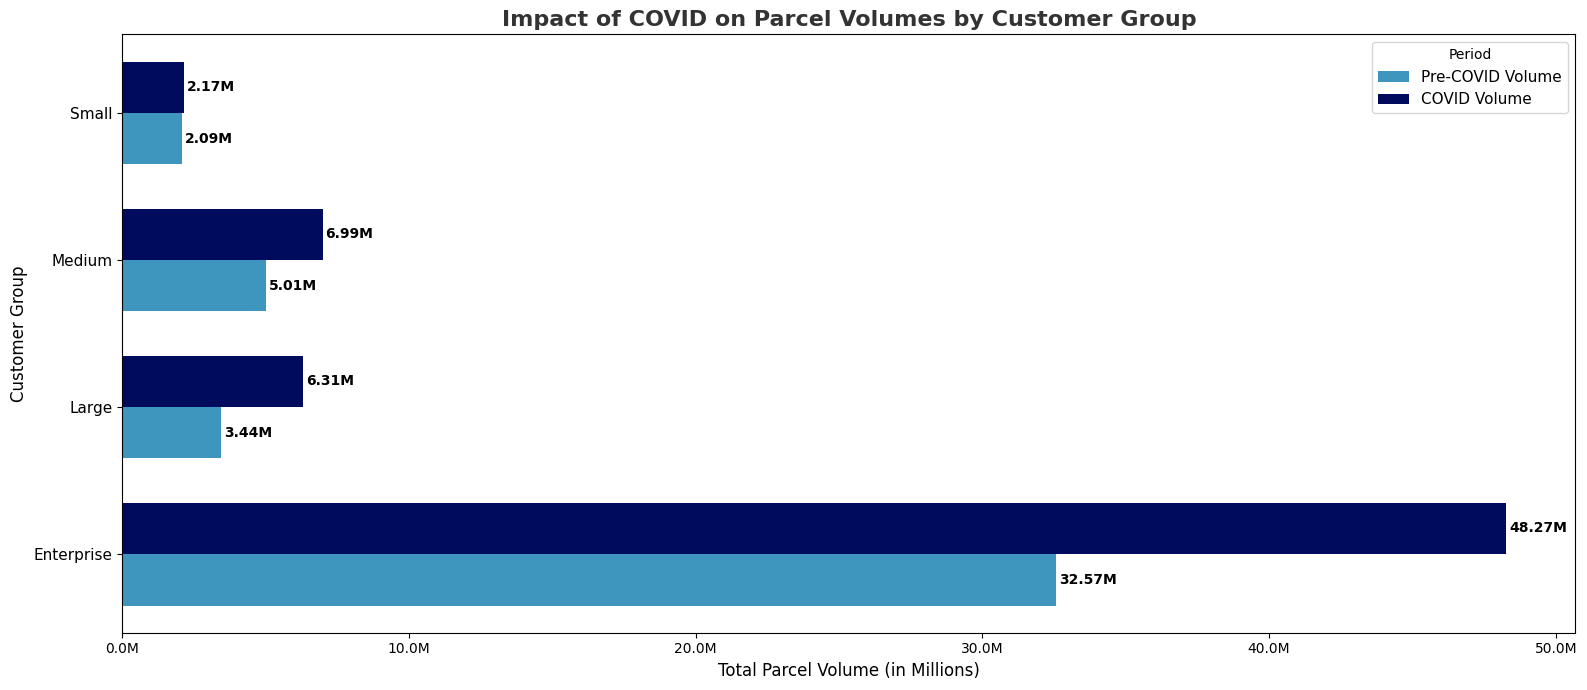

In [15]:
from matplotlib.ticker import FuncFormatter
# pre_covid_weeks = list(range(1, 12))
covid_weeks = list(range(12, 54))
# Step 1: Calculate Pre-COVID and COVID Volumes
pre_covid_volumes = parcel_data[(parcel_data['THE_YEAR'] == 2019) &
                            (parcel_data['THE_WEEK'].isin(covid_weeks))].groupby('FakeCustomerID')['VOLUME'].sum()

covid_volumes = parcel_data[(parcel_data['THE_YEAR'] == 2020) &
                            (parcel_data['THE_WEEK'].isin(covid_weeks))].groupby('FakeCustomerID')['VOLUME'].sum()

# Step 2: Merge Volumes with Customer Data
customer_total_volume['Pre_COVID_Volume'] = pre_covid_volumes
customer_total_volume['COVID_Volume'] = covid_volumes

# Create a DataFrame for side-by-side bar chart
stacked_data = customer_total_volume.groupby('Customer_Group')[['Pre_COVID_Volume', 'COVID_Volume']].sum()

# Convert index to string for compatibility
stacked_data.index = stacked_data.index.astype(str)


# Define a function to format x-axis values in millions
def format_millions(x, _):
    return f'{x / 1e6:.1f}M'

# Plot the side-by-side horizontal bar graph
fig, ax = plt.subplots(figsize=(16, 7))  # Increased figure size for clarity

y_positions = np.arange(len(stacked_data.index))  # Numeric positions for y-axis
bar_height = 0.35  # Height of the bars

# Plot Pre-COVID Volumes
ax.barh(y_positions - bar_height / 2, stacked_data['Pre_COVID_Volume'],
        height=bar_height, label='Pre-COVID Volume', color='#3e95be')

# Plot COVID Volumes
ax.barh(y_positions + bar_height / 2, stacked_data['COVID_Volume'],
        height=bar_height, label='COVID Volume', color='#000b5d')

# Customize y-axis
ax.set_yticks(y_positions)
ax.set_yticklabels(stacked_data.index, fontsize=11)

# Add Titles and Labels
ax.set_title('Impact of COVID on Parcel Volumes by Customer Group', fontsize=16, fontweight='bold', color='#333333')
ax.set_ylabel('Customer Group', fontsize=12)
ax.set_xlabel('Total Parcel Volume (in Millions)', fontsize=12)

# Format the x-axis values to show in millions
ax.xaxis.set_major_formatter(FuncFormatter(format_millions))

# Add Legend
ax.legend(title='Period', fontsize=11, loc='upper right')

# Add Annotations on Bars
for i, (pre_covid, covid) in enumerate(zip(stacked_data['Pre_COVID_Volume'], stacked_data['COVID_Volume'])):
    ax.text(pre_covid + 1e5, i - bar_height / 2, f'{pre_covid / 1e6:.2f}M',
            ha='left', va='center', fontsize=10, color='black', fontweight='bold')
    ax.text(covid + 1e5, i + bar_height / 2, f'{covid / 1e6:.2f}M',
            ha='left', va='center', fontsize=10, color='black', fontweight='bold')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


In [16]:
conditions = [
    customer_total_volume['ISGR (%)'] > 10,    # Growing
    (customer_total_volume['ISGR (%)'] >= 0) & (customer_total_volume['ISGR (%)'] <= 10),  # Moderately Growing
    customer_total_volume['ISGR (%)'] < 0   # Declining
]
choices = ['Growing', 'Moderately Growing', 'Declining']
customer_total_volume['ISGR_Category'] = np.select(conditions, choices)


grouped_data = customer_total_volume.groupby(['Customer_Group', 'ISGR_Category']).size().unstack(fill_value=0)


grouped_percentages = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

valid_categories = ['Growing', 'Moderately Growing', 'Declining']
colors = {'Growing': '#3e95be', 'Moderately Growing': '#000b5d', 'Declining': '#0063a1'}


bar_width = 0.25  # Width of each bar
x_positions = np.arange(len(grouped_percentages.index))  # Base positions for customer groups

fig, ax = plt.subplots(figsize=(16, 7))


for i, category in enumerate(valid_categories):
    # Extract values for the current growth category
    values = grouped_percentages[category].values if category in grouped_percentages.columns else np.zeros(len(x_positions))

    # Calculate positions for the bars
    positions = x_positions + i * bar_width

    # Plot bars
    ax.bar(positions, values, width=bar_width, label=category, color=colors[category], alpha=0.85)

    # Add annotations
    for pos, value in zip(positions, values):
        if value > 0:  # Only annotate non-zero bars
            ax.text(pos, value + 1, f'{value:.1f}%', ha='center', va='bottom', fontsize=9, fontweight='bold', color='black')


ax.set_title('Growth Distribution by Customer Group', fontsize=14, fontweight='bold')
ax.set_xlabel('Customer Group', fontsize=12)
ax.set_ylabel('Percentage of Customers (%)', fontsize=12)


ax.set_xticks(x_positions + bar_width)
ax.set_xticklabels(grouped_percentages.index, rotation=15, fontsize=10)

ax.set_ylim(0, 100)  # Limit Y-axis to 100%

ax.legend(title='Growth Category', fontsize=10)

plt.tight_layout()
plt.show()

TypeError: Choicelist and default value do not have a common dtype: The DType <class 'numpy.dtypes._PyLongDType'> could not be promoted by <class 'numpy.dtypes.StrDType'>. This means that no common DType exists for the given inputs. For example they cannot be stored in a single array unless the dtype is `object`. The full list of DTypes is: (<class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes.StrDType'>, <class 'numpy.dtypes._PyLongDType'>)

In [ ]:
customer_total_volume

,ISGR_Previous_Volume,ISGR_Current_Volume,GR_Previous_Volume,GR_Current_Volume,ISGR (%),Growth_Rate (%),Total_Volume_Customer,Customer_Group,Pre_COVID_Volume,COVID_Volume,ISGR_Category
FakeCustomerID,,,,,,,,,,,
100771,442.0,448.0,1374.0,1341.0,1.357466,-2.401747,1789.0,Small,1498.0,1413.0,Moderately Growing
102180,1365.0,828.0,3857.0,3989.0,-39.340659,3.422349,4817.0,Small,4559.0,4336.0,Declining
102643,745.0,599.0,1925.0,1104.0,-19.597315,-42.649351,1703.0,Small,2094.0,1134.0,Declining
102750,344.0,196.0,669.0,209.0,-43.023256,-68.759342,405.0,Small,738.0,209.0,Declining
103308,19560.0,23748.0,70580.0,79952.0,21.411043,13.278549,103700.0,Medium,76604.0,85596.0,Growing
...,...,...,...,...,...,...,...,...,...,...,...
994361,681.0,778.0,1927.0,880.0,14.243759,-54.333160,1658.0,Small,2100.0,1057.0,Growing
994762,265.0,303.0,808.0,47.0,14.339623,-94.183168,350.0,Small,940.0,199.0,Growing
995173,483.0,315.0,1149.0,4605.0,-34.782609,300.783290,4920.0,Small,1197.0,4790.0,Declining


In [ ]:
weeks_range = list(range(1, 16))

COVID_Volume = parcel_data[ ((parcel_data['THE_YEAR'] == 2020) & (parcel_data['THE_WEEK'].isin(weeks_range)))].groupby('FakeCustomerID')['VOLUME'].sum()


pre_covid_volumes = parcel_data[(parcel_data['THE_YEAR'] == 2019) & (parcel_data['THE_WEEK'].isin(weeks_range))].groupby('FakeCustomerID')['VOLUME'].sum()

customer_total_volume['Current_Volume_Lable'] = COVID_Volume.reindex(customer_total_volume.index, fill_value=0)
customer_total_volume['Pre_Volume_Lable'] = pre_covid_volumes.reindex(customer_total_volume.index, fill_value=0)


# Step 2: Define a function for labeling customers
def assign_label(row):
    if row['Pre_Volume_Lable'] == 0 and row['Current_Volume_Lable'] > 0:
        return 'New Customers'
    elif row['Pre_Volume_Lable'] > 0 and row['Current_Volume_Lable'] == 0:
        return 'Lost Customers'
    elif row['ISGR (%)'] > 0:
        return 'High Growth Customers'
    elif row['ISGR (%)'] == 0:
        return 'Stable Customers'
    elif row['ISGR (%)'] < 0:
        return 'Declining Customers'
    else:
        return 'Unlabeled'

# Step 3: Apply the labeling function to each row
customer_total_volume['Customer_Label'] = customer_total_volume.apply(assign_label, axis=1)

In [ ]:
# Count the number of customers in each label
label_counts = customer_total_volume['Customer_Label'].value_counts()

# Optionally, convert to a DataFrame for further use
label_counts_df = label_counts.reset_index()
label_counts_df.columns = ['Customer_Label', 'Count']

# Display as a DataFrame
print("Customer Label Counts as DataFrame:")
print(label_counts_df)


Customer Label Counts as DataFrame:
          Customer_Label  Count
0  High Growth Customers    536
1    Declining Customers    481
2          New Customers     22
3         Lost Customers     18
4       Stable Customers      4


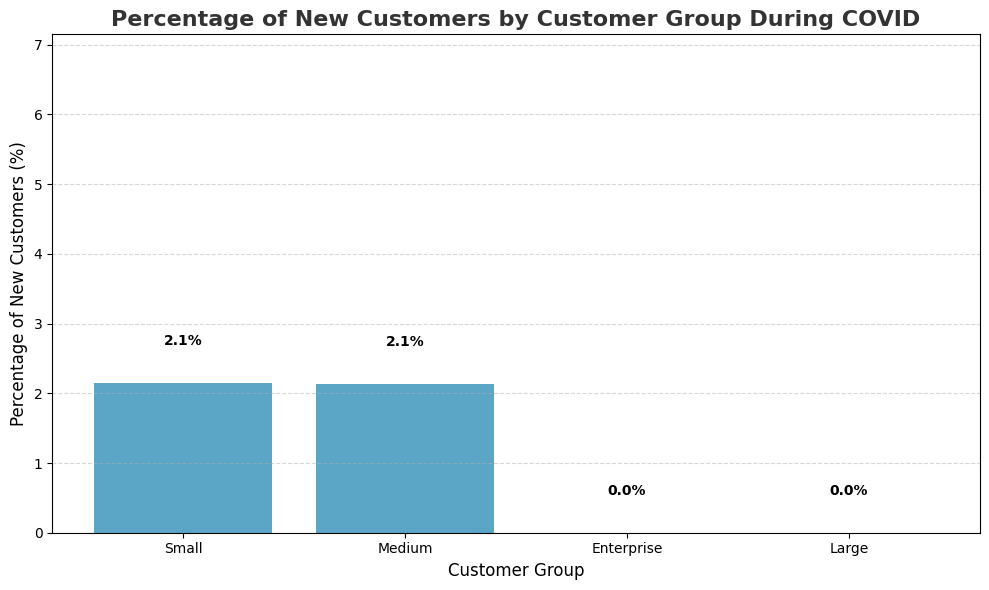

In [ ]:
new_customers = customer_total_volume[customer_total_volume['Customer_Label'] == 'New Customers']

# Step 2: Count "New Customers" and Total Customers by Customer Group
new_customer_counts = new_customers.groupby('Customer_Group').size()
total_customers = customer_total_volume.groupby('Customer_Group').size()

# Step 3: Calculate Percentage of New Customers
percent_new_customers = (new_customer_counts / total_customers) * 100

# Fill NaN values with 0 for groups with no "New Customers"
percent_new_customers = percent_new_customers.fillna(0)


# Step 1: Sort Percentages for Better Visual
percent_new_customers = percent_new_customers.sort_values(ascending=False)

# Step 2: Dynamic Y-axis Limit
max_value = percent_new_customers.max()

# Step 3: Colors for Non-Zero and Zero Values
bar_colors = ['#3e95be' if value > 0 else '#b0b0b0' for value in percent_new_customers]

# Step 4: Plot the Improved Bar Graph
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(percent_new_customers.index, percent_new_customers.values, color=bar_colors, alpha=0.85)

# Add Titles and Labels
ax.set_title('Percentage of New Customers by Customer Group During COVID', fontsize=16, fontweight='bold', color='#333333')
ax.set_xlabel('Customer Group', fontsize=12)
ax.set_ylabel('Percentage of New Customers (%)', fontsize=12)

# Adjust Y-axis dynamically
ax.set_ylim(0, max_value + 5)  # Add padding for better display

# Add Gridlines
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add Annotations on Bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Improve Layout
plt.tight_layout()
plt.show()


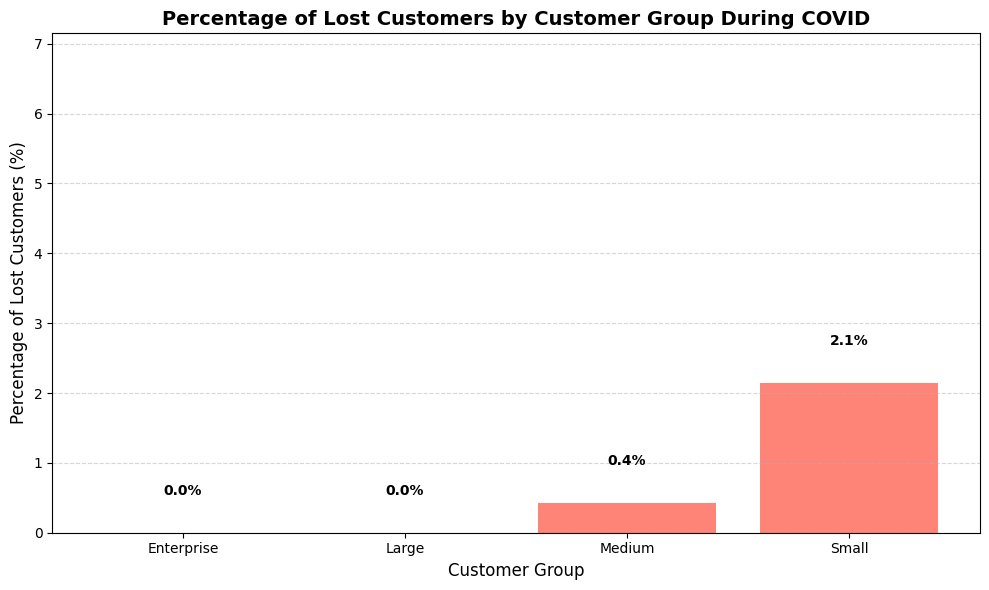

Percentage of Lost Customers by Customer Group:
Customer_Group
Enterprise    0.000000
Large         0.000000
Medium        0.427350
Small         2.149178
dtype: float64


In [ ]:

# Step 1: Filter Lost Customers
lost_customers = customer_total_volume[customer_total_volume['Customer_Label'] == 'Lost Customers']

# Step 2: Count Lost Customers and Total Customers by Group
lost_customers_count = lost_customers.groupby('Customer_Group').size()
total_customers_count = customer_total_volume.groupby('Customer_Group').size()

# Step 3: Calculate Percentage of Lost Customers
lost_percentage = (lost_customers_count / total_customers_count) * 100
lost_percentage = lost_percentage.fillna(0)  # Fill NaN values with 0 for groups with no lost customers

# Step 4: Plot the Bar Graph
fig, ax = plt.subplots(figsize=(10, 6))

bars = ax.bar(lost_percentage.index, lost_percentage.values, color='#FF6F61', alpha=0.85)

# Add Titles and Labels
ax.set_title('Percentage of Lost Customers by Customer Group During COVID', fontsize=14, fontweight='bold')
ax.set_xlabel('Customer Group', fontsize=12)
ax.set_ylabel('Percentage of Lost Customers (%)', fontsize=12)
ax.set_ylim(0, max(lost_percentage) + 5)  # Add some padding to the Y-axis
ax.grid(axis='y', linestyle='--', alpha=0.5)

# Add Annotations on Bars
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.5, f'{height:.1f}%',
            ha='center', va='bottom', fontsize=10, fontweight='bold', color='black')

# Adjust Layout
plt.tight_layout()
plt.show()

# Optional: Display Results in Table Format
print("Percentage of Lost Customers by Customer Group:")
print(lost_percentage)


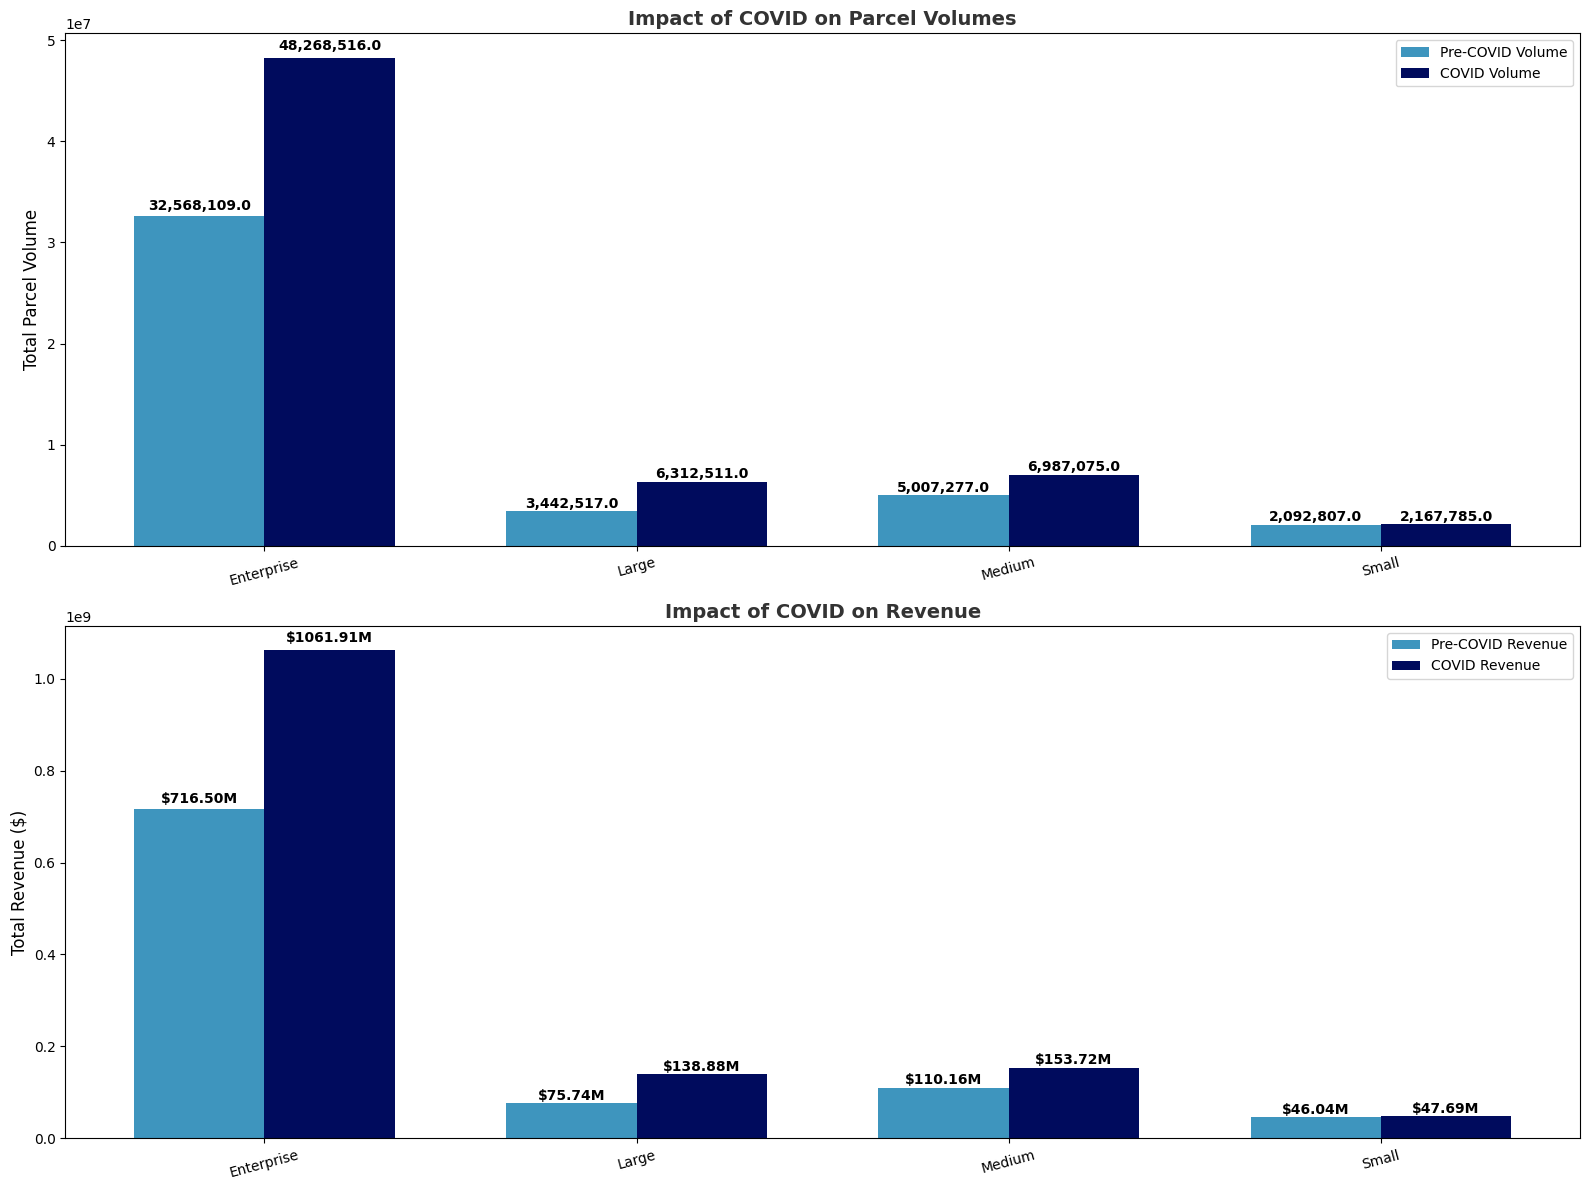

In [ ]:
# Step 1: Define Bar Positions
base_parcel_cost = 22  # Cost per parcel

customer_total_volume['Pre_COVID_Revenue'] = customer_total_volume['Pre_COVID_Volume'] * base_parcel_cost
customer_total_volume['COVID_Revenue'] = customer_total_volume['COVID_Volume'] * base_parcel_cost

# Step 2: Aggregate Volumes and Revenues by Customer Group
grouped_data = customer_total_volume.groupby('Customer_Group').agg({
    'Pre_COVID_Volume': 'sum',
    'COVID_Volume': 'sum',
    'Pre_COVID_Revenue': 'sum',
    'COVID_Revenue': 'sum'
}).reset_index()

x = np.arange(len(grouped_data['Customer_Group']))  # Numeric positions for customer groups
bar_width = 0.35  # Width of each bar

fig, ax = plt.subplots(2, 1, figsize=(16, 12))  # Create two subplots (top and bottom)

# Step 2: Plot Pre-COVID Volumes
ax[0].bar(x, grouped_data['Pre_COVID_Volume'], width=bar_width, color='#3e95be', label='Pre-COVID Volume')
ax[0].bar(x + bar_width, grouped_data['COVID_Volume'], width=bar_width, color='#000b5d', label='COVID Volume')

# Add Annotations (Pre-COVID Volumes)
for i, value in enumerate(grouped_data['Pre_COVID_Volume']):
    ax[0].text(i, value + value * 0.01, f'{value:,}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add Annotations (COVID Volumes)
for i, value in enumerate(grouped_data['COVID_Volume']):
    ax[0].text(i + bar_width, value + value * 0.01, f'{value:,}', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Customize the first subplot
ax[0].set_title('Impact of COVID on Parcel Volumes', fontsize=14, fontweight='bold', color='#333333')
ax[0].set_xticks(x + bar_width / 2)
ax[0].set_xticklabels(grouped_data['Customer_Group'], rotation=15, fontsize=10)
ax[0].set_ylabel('Total Parcel Volume', fontsize=12)
ax[0].legend()

# Step 3: Plot Pre-COVID Revenues
ax[1].bar(x, grouped_data['Pre_COVID_Revenue'], width=bar_width, color='#3e95be', label='Pre-COVID Revenue')
ax[1].bar(x + bar_width, grouped_data['COVID_Revenue'], width=bar_width, color='#000b5d', label='COVID Revenue')

# Add Annotations (Pre-COVID Revenues)
for i, value in enumerate(grouped_data['Pre_COVID_Revenue']):
    ax[1].text(i, value + value * 0.01, f'${value / 1e6:.2f}M', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Add Annotations (COVID Revenues)
for i, value in enumerate(grouped_data['COVID_Revenue']):
    ax[1].text(i + bar_width, value + value * 0.01, f'${value / 1e6:.2f}M', ha='center', va='bottom', fontsize=10, color='black', fontweight='bold')

# Customize the second subplot
ax[1].set_title('Impact of COVID on Revenue', fontsize=14, fontweight='bold', color='#333333')
ax[1].set_xticks(x + bar_width / 2)
ax[1].set_xticklabels(grouped_data['Customer_Group'], rotation=15, fontsize=10)
ax[1].set_ylabel('Total Revenue ($)', fontsize=12)
ax[1].legend()

# Adjust layout
plt.tight_layout()
plt.show()


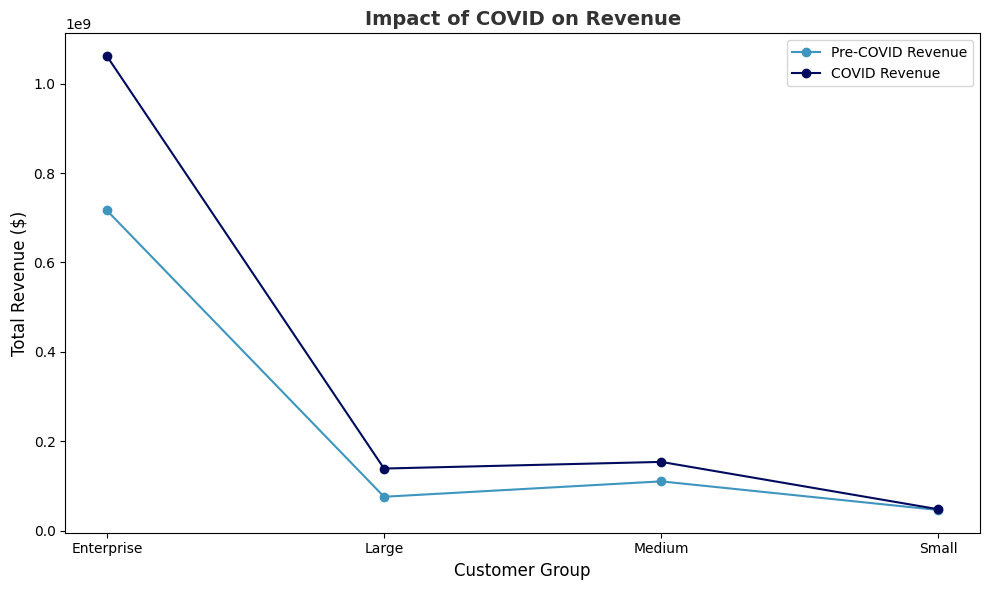

In [ ]:
# Step 1: Define Revenue
base_parcel_cost = 22  # Cost per parcel
customer_total_volume['Pre_COVID_Revenue'] = customer_total_volume['Pre_COVID_Volume'] * base_parcel_cost
customer_total_volume['COVID_Revenue'] = customer_total_volume['COVID_Volume'] * base_parcel_cost

# Step 2: Aggregate Revenues by Customer Group
grouped_data = customer_total_volume.groupby('Customer_Group').agg({
    'Pre_COVID_Revenue': 'sum',
    'COVID_Revenue': 'sum'
}).reset_index()

# Plot the line chart
fig, ax = plt.subplots(figsize=(10, 6))

# Plot Pre-COVID Revenues
ax.plot(grouped_data['Customer_Group'], grouped_data['Pre_COVID_Revenue'], marker='o', linestyle='-', color='#3e95be', label='Pre-COVID Revenue')

# Plot COVID Revenues
ax.plot(grouped_data['Customer_Group'], grouped_data['COVID_Revenue'], marker='o', linestyle='-', color='#000b5d', label='COVID Revenue')

# Add Titles and Labels
ax.set_title('Impact of COVID on Revenue', fontsize=14, fontweight='bold', color='#333333')
ax.set_xlabel('Customer Group', fontsize=12)
ax.set_ylabel('Total Revenue ($)', fontsize=12)

# Add Legend
ax.legend()
# Show the chart
plt.tight_layout()
plt.show()